Программа использует индикатор скользящей средней (MACD) для определения момента покупки или продажи

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [40]:
#загружаем данные с Yahoo Finance
data = yf.download('AAPL', '2021-01-01', '2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [19]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,134.080002,134.740005,131.720001,132.690002,131.709213,99116600
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453430,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664207,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952286,109578200
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,179.151749,62348900


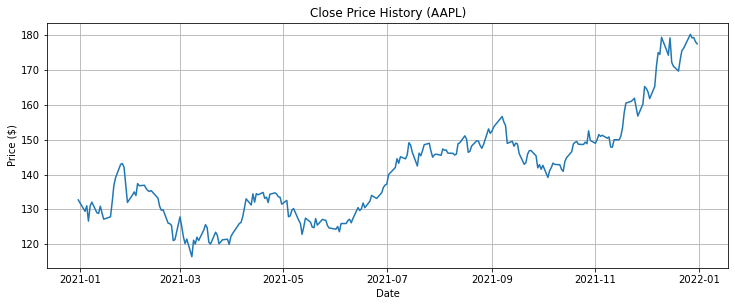

In [41]:
#Визуализируем цену
plt.figure(figsize=(12.2, 4.5))
plt.plot(data['Close'], label='Close')
plt.title('Close Price History (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid()
plt.show()

In [42]:
#вычисляем короткую и длинную скользящие средние (EMA)
ShortEMA = data.Close.ewm(span=12, adjust=False).mean()
LongEMA = data.Close.ewm(span=26, adjust=False).mean()
#MACD 
MACD = ShortEMA - LongEMA
#сигнальная линия
signal = MACD.ewm(span=9, adjust=False).mean()

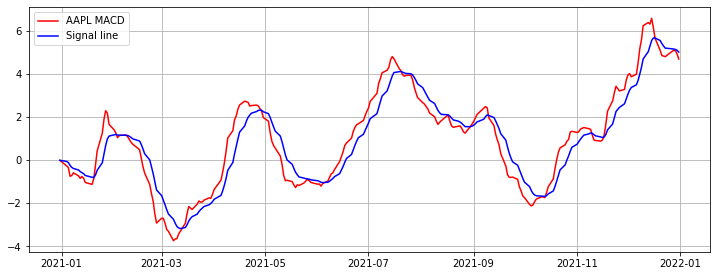

In [43]:
#Рисуем сигнальную и MACD линии
plt.figure(figsize=(12.2, 4.5))
plt.plot(data.index, MACD, label = 'AAPL MACD', color= 'red')
plt.plot(data.index, signal, label = 'Signal line', color= 'blue')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Принцип стратегии прост: когда линия MACD пересекает сигнальную сверху вниз - это сигнал к продаже, снизу вверх - к покупке

In [30]:
#Добавим новые колонки в таблицу
data['MACD'] = MACD
data['Signal line'] = signal

In [31]:
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)

    return(Buy, Sell)

In [33]:
#добавим Buy, Sell колонки
a = buy_sell(data)
data['Buy_Signal_Price'] = a[0]
data['Sell_Signal_Price'] = a[1]

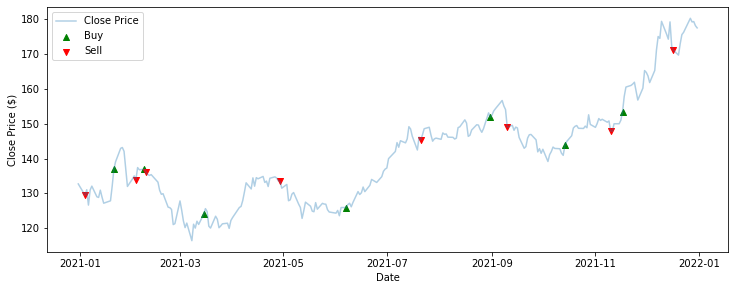

In [39]:
#Визуализируем. Красные метки дают сигнал о продаже, зеленые - о покупке
plt.figure(figsize=(12.2, 4.5))
plt.scatter(data.index, data['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha = 1)
plt.scatter(data.index, data['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha = 1)
plt.plot(data['Close'], label='Close Price', alpha=0.35)
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend(loc = 'upper left')
plt.show()